In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
    
register_matplotlib_converters()

In [43]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [44]:
url = "https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/catfish.csv"

In [45]:
catFish_data = pd.read_csv(url, index_col=0,parse_dates=[0],squeeze=True, date_parser = parser)
catFish_data.head()

Date
1986-01-01     9034
1986-02-01     9596
1986-03-01    10558
1986-04-01     9002
1986-05-01     9239
Name: Total, dtype: int64

In [46]:
start_date = datetime(2000,1,1)
end_date = datetime(2004,1,1)
catfish_plot_data = catFish_data[start_date:end_date]

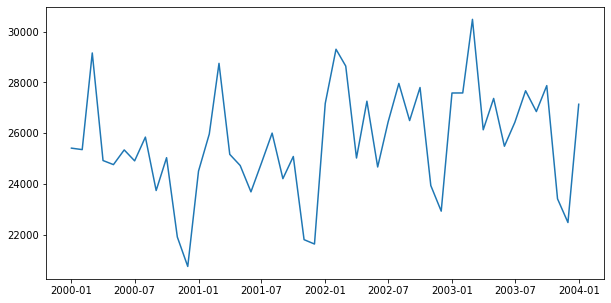

In [47]:
plt.figure(figsize=(10,5))
plt.plot(catfish_plot_data)

Text(0.5, 1.0, 'First Difference plot')

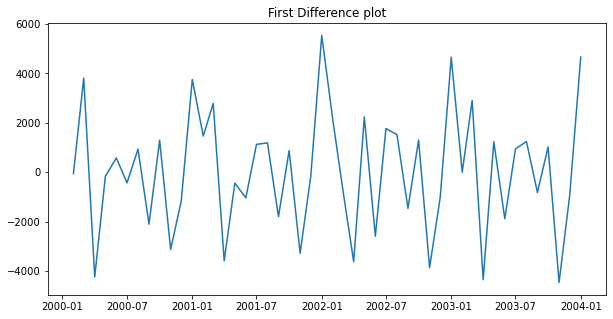

In [48]:
first_diff = catfish_plot_data.diff()[1:]
plt.figure(figsize=(10,5))
plt.plot(first_diff)
plt.title("First Difference plot")

## ACF

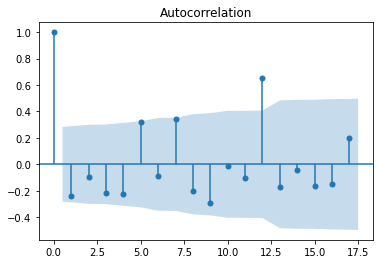

In [49]:
acf_plot = plot_acf(first_diff)


## PACF

C:\Users\Omkar\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


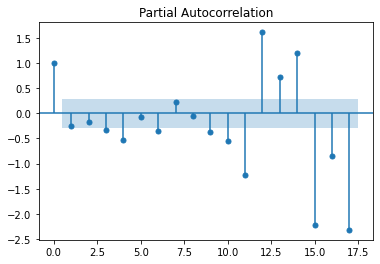

In [50]:
pacf_plot = plot_pacf(first_diff)

## Train Test Split

In [51]:
train_end = datetime(2003,7,1)
test_end = datetime(2004,1,1)

train_data = first_diff[:train_end]
test_data = first_diff[train_end + timedelta(days=1):test_end]

## ARMA Model

In [52]:
model = ARMA(train_data, order=(4,1))

C:\Users\Omkar\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Omkar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [53]:
model_fit = model.fit()
print(model_fit.summary())


                              ARMA Model Results                              
Dep. Variable:                  Total   No. Observations:                   42
Model:                     ARMA(4, 1)   Log Likelihood                -376.584
Method:                       css-mle   S.D. of innovations           1850.781
Date:                Tue, 08 Jun 2021   AIC                            767.167
Time:                        16:41:03   BIC                            779.331
Sample:                    02-01-2000   HQIC                           771.626
                         - 07-01-2003                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.3278    129.751      0.288      0.774    -216.980     291.636
ar.L1.Total    -0.8666      0.185     -4.692      0.000      -1.229      -0.505
ar.L2.Total    -0.4236      0.166     -2.547    

In [54]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [55]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

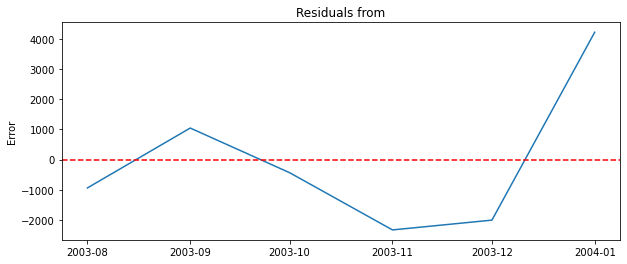

In [56]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from')
plt.ylabel('Error')
plt.axhline(0, color='r', linestyle='--')

Text(0, 0.5, 'Sales')

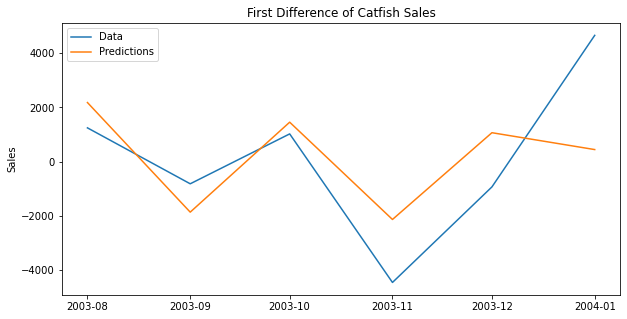

In [57]:
plt.figure(figsize=(10,5))
plt.plot(test_data)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'))
plt.title('First Difference of Catfish Sales')
plt.ylabel('Sales')

In [58]:
print('RMSE:', np.sqrt(np.mean(residuals**2)))


RMSE: 2210.261606677166
